# Task **1**



#Porposed Analytical Question - What factors are most strongly correlated with employee attrition and how does employee attrition vary by department or job role? Can we predict employee attrition using machine learning? If yes, predict attrition using Machine Learning.

Answer - 




**To answer the proposed question we could start by exploring the variables in the employee attrition dataset, such as job satisfaction, salary, years of experience, job role, and any other relevant variables. We could then use statistical techniques, such as correlation analysis, to identify which variables are most strongly correlated with employee attrition.**

**To answer the second part of the question, we could group the employee attrition data by department or job role and compare the attrition rates between different groups. With this we can identify any patterns or trends in employee attrition that may be related to certain departments or job roles.**

**And Yes. We can predict employee attrition using Machine Learning. We can use machine learning algorithm like KNN, Random Forest Classifier, Decision Tree etc.**

**The solution for this proposed problem are implemented below via programming.**

# Task 2

 
#Programs for Exploratory Data Analysis (EDA) of Employee Attrition using the dataset HR Employee Attrition

In [2]:
#Importing the required Python Libraries that will be used for this project

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os


In [3]:
#Loding the dataset named HR Employee Attrition renamed as employee_dataset
from google.colab import files #this code is used to load data on google collab
uploaded = files.upload()

Saving employee_dataset.csv to employee_dataset.csv


In [4]:
#storing the datset into a dataframe defined as "df" using pandas library

df = pd.read_csv('employee_dataset.csv')


*Analysing the DataSet*


In [5]:
#retrieving information about the pandas DataFrame df

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#retrieving the first few rows of the DataFrame by using head method

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#generating the descriptive statistics of the Pandas DataFrame df using 'describe' method

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#checking the number of rows and coloumns in the dataset


print("The rows and columns in the dataset is: ")

df.shape

The rows and columns in the dataset is: 


(1470, 35)

**From the above output we can see that there are 1470 rows and 35 Columns**


In [11]:
#checking the column name of dataset and its corresponding data types

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
#checking for null values in the dataset

df.isnull().values.any()

False

In [13]:
#lets cross verify it

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**From the above output we can see that there is no Null Value in the dataset** 

*Visualizing the distribution of employee attributes*













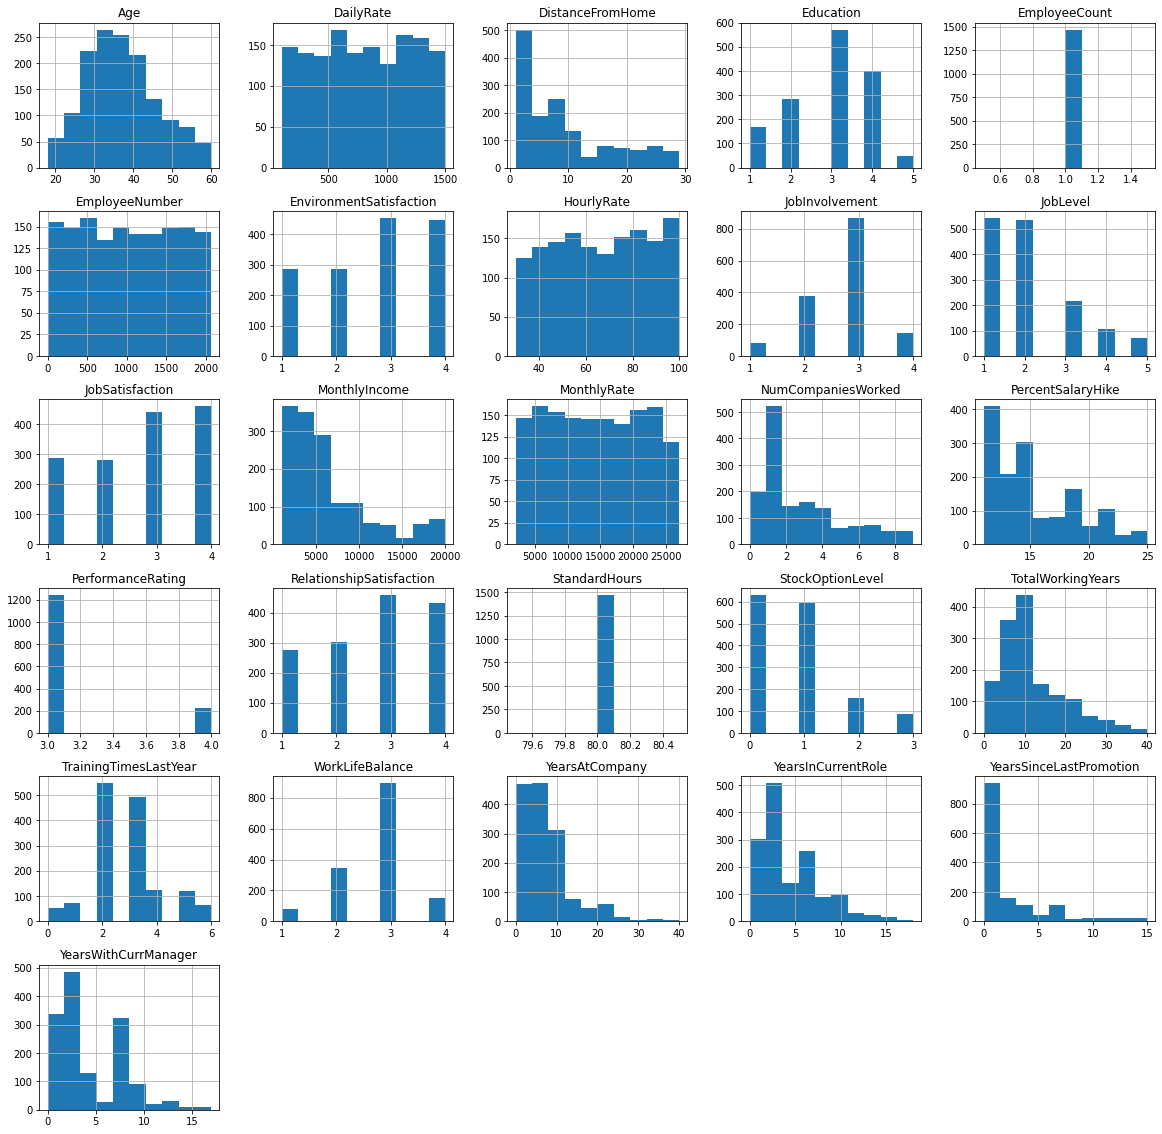

In [14]:
# This code is generating a histogram of the columns in a Pandas DataFrame

df.hist(figsize=(20, 20))
plt.show()

*The following code is to count the number of employee attrition, the number of employee that stayed defined by no and that left define by yes*

In [15]:
# This code is counting the number of occurrences of each unique value in the Attrition column of a Pandas DataFrame

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Hence from the above code output we can see that 237 left the job and 1233 stayed in the job**





*EMPLOYEE ATTRIBUTION DISTRIBUTION IN THE COMPANY*

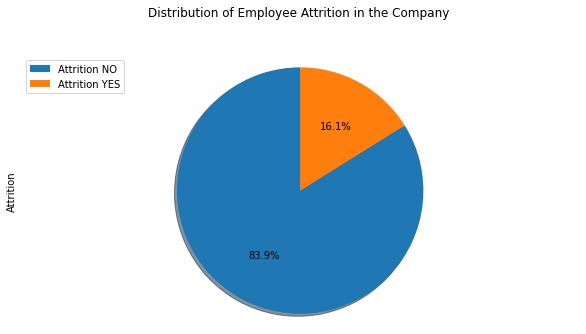

In [16]:
#This code is generating a pie chart that visualizes the distribution of employee attrition in a company. 
#The pie chart will show the percentage of employees who have experienced attrition (labeled as "Attrition YES") and the percentage of employees who have not experienced attrition (labeled as "Attrition NO").



labels = 'Attrition NO','Attrition YES'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()


**From the pie chart, we can deduce that out of 1470 employees, 16% quit their jobs for various reasons, while the remaining 84% opted to stay with the company.**

*Generating the unique attributes of the dataframe and thier unique values*

In [17]:
#This code is printing the attributes of the 'df' DataFrame and the unique values for each attribute.

#The code will print the name of each column in the DataFrame, followed by a list of the unique values in that column and their counts, sorted in descending order. 
#This is useful for understanding the distribution of values in each column and identifying any patterns or trends.

print('The attributes of the dataframe and their unique values are as below :-\n')
for i in df.columns:
    print(f' {i} \n')
    print(df[i].value_counts().sort_values(ascending=False))
    print('--------- ' * 5)

The attributes of the dataframe and their unique values are as below :-

 Age 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
--------- --------- --------- --------- --------- 
 Attrition 

No     1233
Yes     237
Name: Attrition, dtype: int64
--------- --------- --------- --------- --------- 
 BusinessTravel 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------- --------- --------- --------- --------- 
 DailyRate 

691     6
530     5
1329    5
1082    5
329     5
       ..
1439    1
1369    1
172     1
1255    1
628     1
Name: DailyRate, Length: 886, dtype

*Evaluating the feature names*

*Eliminating Pointless Features*



*1.   StandardHours*

*2.   EmployeeCount*

*3.   Over18*

*4.   EmployeeNumber*

*5.   StockOptionLevel*























In [18]:
# This code is dropping columns StandardHours, EmployeeCount, Over18, EmployeeNumber, StockOptionLevel, from the DataFrame and displaying the resulting DataFrame.


df.drop(columns=['StandardHours',
                   'EmployeeCount',
                   'Over18',
                   'EmployeeNumber',
                   'StockOptionLevel'],
          inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [20]:
#now let's check the new updated dataframe
print("The updated rows and coloumns in the dataset is: ")
df.shape

The updated rows and coloumns in the dataset is: 


(1470, 30)

*Investigation of the Rating Features*



*1.   JobSatisfaction*

*2.   EnvironmentSatisfaction*

*3.   RelationshipSatisfaction*

*4.   JobInvolvement*

*5.  WorkLifeBalance*

*6.   PerformanceRating*










*Let's count this attributes again for better understanding and visualize them*

In [21]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [22]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [23]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [24]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [25]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [26]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

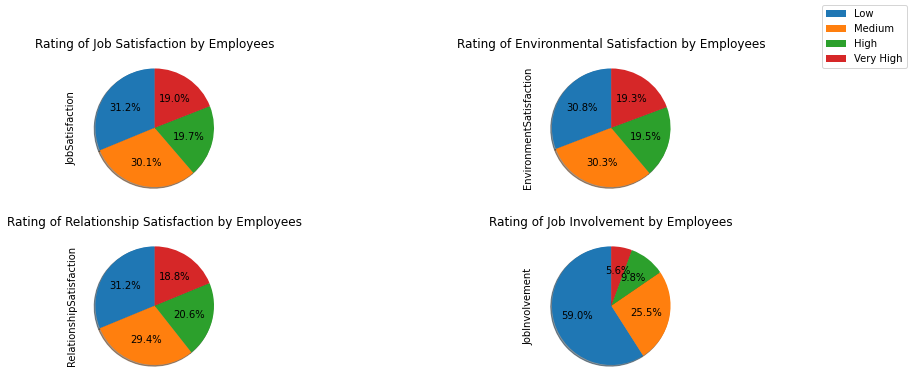

In [27]:
#This code is generating four pie charts that visualize the distribution of employee satisfaction ratings in a company. 
#The pie charts will show the percentage of employees who have given a certain rating for job satisfaction, environmental satisfaction, relationship satisfaction, and job involvement.



fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)
   

labels = 'Low','Medium','High','Very High'


df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')

fig.legend(labels=labels,loc='upper right')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')


plt.show()

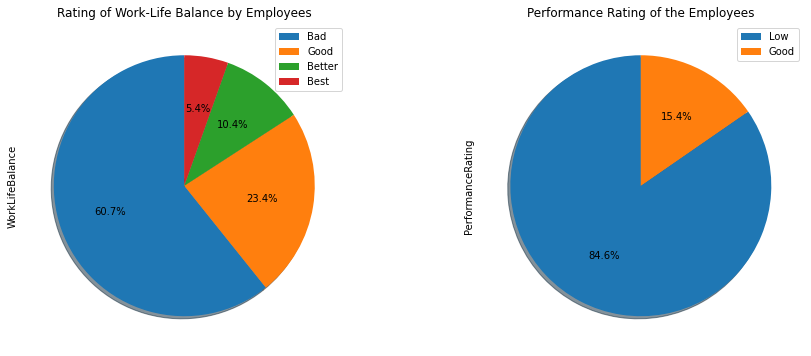

In [28]:
#This code is generating two pie charts that visualize the distribution of employee work-life balance ratings and performance ratings in a company. 
#The pie charts will show the percentage of employees who have given a certain rating for work-life balance and performance.


fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()


**We can visualize from the subplot and piecharts that more than 60% of the staff members are:**

**1. Not Happy with Their Job**

**2. Unhappy with the Work Environment**

**3. Unhappy with Their Relationship**

**4. Avoiding involvement in their work**

**5. Nearly 60% of workers regarded their work-life balance as poor.**

**6. A low performance rating is given to about 85% of the workforce.**

*Now Let's analyze the importance of business travel feature in employee's attrition*

*Visualizing* Business Travel with Attrition


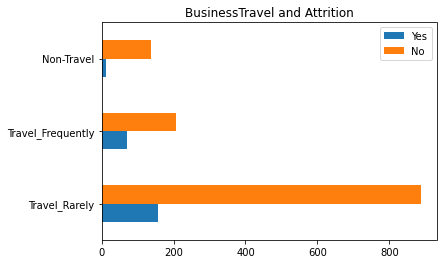

In [29]:
#This code is generating a bar chart that visualizes the relationship between employee business travel frequency and attrition in a company. 
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by business travel frequency.




n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['BusinessTravel'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['BusinessTravel'].value_counts()

n_df.plot.barh(title = 'BusinessTravel and Attrition')

**From the above graph visualization it can be clearly state that Employees who travel rarely have more attrition rate followed by Employees who travel frequently.**

**One suggestion to reduce this attrition is to perform a monthly poll and assign trips based on the employees' interest in business travel**

*Now we can analyse the attrition based on the Work Exeperince of the employee by considering the following features*



*1. YearsAtCompany*

*2. YearsInCurrentRole*

*3. YearsSinceLastPromotion*

*4. YearsWithCurrManager*

*5. TotalWorkingYears*


In [30]:
#This code is selecting defined columns from the DataFrame that are related to an employee's work experience, and displaying the resulting DataFrame. 
#This is useful if the analysis only requires these specific columns, or if it is necessary to focus on certain aspects of an employee's work experience.



workexperience = df[['YearsAtCompany', 
           'YearsInCurrentRole', 
           'YearsSinceLastPromotion', 
           'YearsWithCurrManager', 
           'TotalWorkingYears', 
           'Attrition']]
workexperience.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


*Now Let's visualise this by plottign a bar graph*

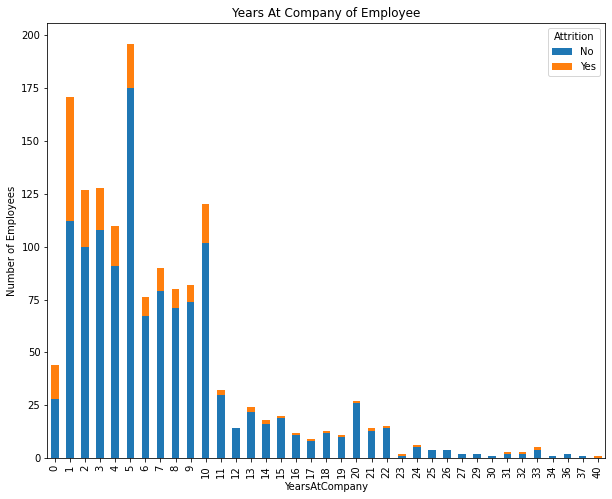

In [31]:
#This code is generating a bar chart that visualizes the relationship between employee tenure at a company and attrition. 
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by the number of years they have been working at the company.


YearsAtCompany = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

YearsAtCompany.plot(kind='bar', stacked='False',figsize=(10,8))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

**As we can observed from the graph that freshers quit their jobs most, so greater attention should be paid to them and the reasons for their departure from the organisation.**

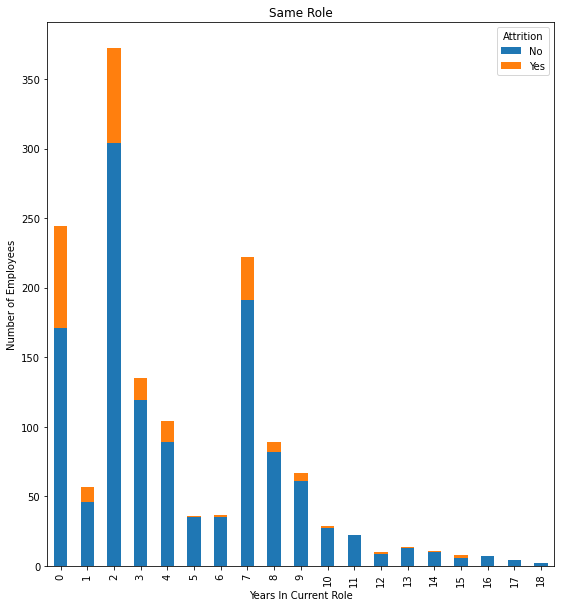

In [32]:
#This code is generating a bar chart that visualizes the relationship between the number of years an employee has been in their current role and attrition. 
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by the number of years they have been in their current role.

yearsincurrentrole = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()



fig = plt.figure() # creating figure

ax0 = fig.add_subplot(121) 



yearsincurrentrole.plot(kind='bar', stacked='False',figsize=(20,10), ax=ax0) 
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')



plt.show()

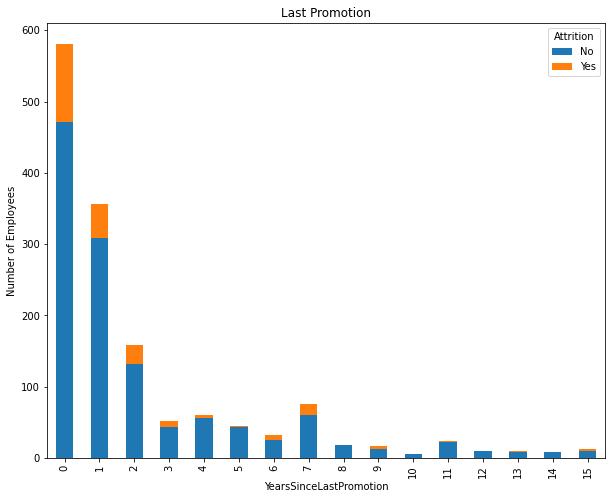

In [33]:
#This code is generating a bar chart that visualizes the relationship between the number of years since an employee's last promotion and attrition. 
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by the number of years since their last promotion


yearssincelastpromotion = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()

yearssincelastpromotion.plot(kind='bar', stacked='False',figsize=(10,8))

plt.title('Last Promotion')
plt.ylabel('Number of Employees')
plt.show()

**It is abundantly obvious from the above two plots that employees in the same position or those who are not promoted are more likely to leave the organisation. Since experienced workers leaving their jobs would have the most effects on the organisation, it is a serious problem.**

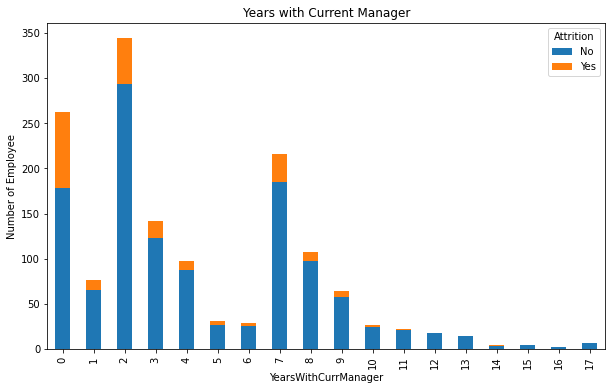

In [34]:
#This code is generating a bar chart that visualizes the relationship between the number of years an employee has been working with their current manager and attrition. 
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by the number of years they have been working with their current manager


yearswithcurrentmanager = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

yearswithcurrentmanager.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

**It is obvious that the relationship between the manager and the employees was not a joyful one at first. In order to lower the rate of attrition, it is crucial that the manager communicates with the employee from the outset and tries to understand them.**

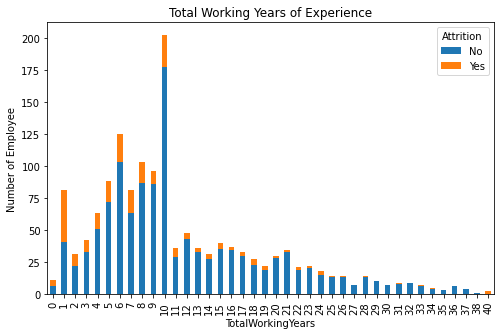

In [35]:
#This code is generating a bar chart that visualizes the relationship between the total number of working years of experience an employee has and attrition.
#The bar chart will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by their total number of working years of experience.


TotalWorkingYears = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

TotalWorkingYears.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()


**It is observed from the above graph that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start**

*Now* let's Analyse the Attrition of employee based on the Monthly Income feature

In [36]:
#This code is creating a new DataFrame called mi that contains the 'MonthlyIncome' values of employees who have experienced attrition.
#It is doing this by subsetting the rows of the original DataFrame df where the 'Attrition' column is equal to 'Yes'.
#The resulting DataFrame is then reset using the reset_index() method, which resets the row indices to a range from 0 to n-1, where n is the number of rows in the DataFrame.
#The 'index' column is then dropped using the drop() method.
#Next, a new DataFrame called mn is created that contains the 'MonthlyIncome' values of employees who have not experienced attrition. This is done in a similar way to the mi DataFrame.

#Finally, a new column called 'mn' is created in the mi DataFrame and its values are set to the values in the 'No' column of the mn DataFrame. The column names in the mi DataFrame are then renamed to 'Yes' and 'No' using the rename() method. The resulting DataFrame is then displayed using the head() method, which displays the first 5 rows of the DataFrame.


mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


*Lets plot this in a graph for better visualization*

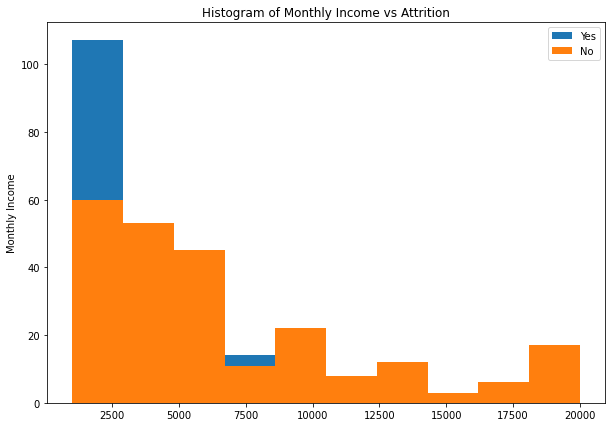

In [37]:
#This code is generating a histogram that visualizes the distribution of monthly income for employees who have experienced attrition and those who have not. 
#The histogram will show the number of employees who have experienced attrition and who have not experienced attrition, broken down by their monthly income.


mi.plot(kind='hist', figsize=(10, 7))

plt.title('Histogram of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

**From the above histogram we can see that employees who quit their jobs typically earn less on a monthly basis than those who stayed with the organisation.**

*Attrition analysis of employee based on Department*

In [38]:
#This code is creating a new DataFrame called department that contains the 'Department' and 'Attrition' columns from the original DataFrame df. This is done by subsetting the columns of df using the [] operator and passing in a list of column names. The resulting DataFrame is then displayed using the head() method, which displays the first 5 rows of the DataFrame.



department = df[['Department','Attrition']]
department.head()


,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [39]:
#This code is counting the number of occurrences of each unique value in the 'Department' column of the DataFrame department and displaying the counts.


department['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

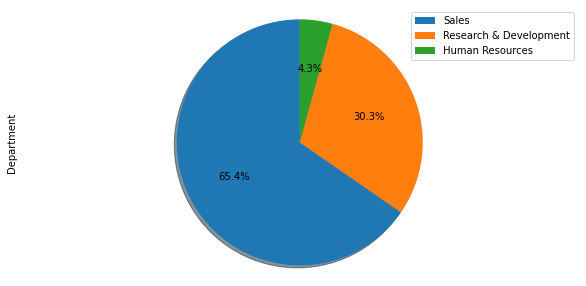

In [40]:
#This code is generating a pie chart that visualizes the distribution of employees across different departments. The pie chart will show the percentage of employees in each department.


department['Department'].value_counts().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=department['Department'].unique(), loc='upper right') 

In [41]:
#This code is creating a new DataFrame called dpm that contains the number of employees who have experienced attrition and who have not experienced attrition, broken down by department. The resulting DataFrame will show the counts for each department as separate columns.

dpm = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


*Now Let's plot this in a bar graph*

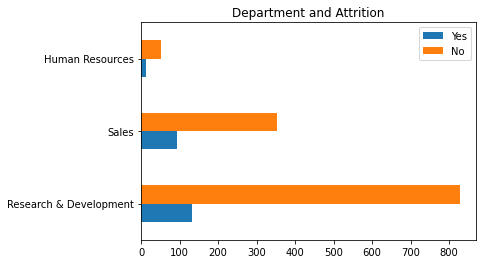

In [42]:
#This code is creating a new DataFrame called n_df that contains the number of employees who have experienced attrition and who have not experienced attrition, broken down by department. The resulting DataFrame will show the counts for each department as separate columns. The code then generates a horizontal bar chart that visualizes the distribution of employees across different departments, with separate bars for employees who have experienced attrition and who have not experienced attrition.

n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Department'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Department'].value_counts()

n_df.plot.barh(title = 'Department and Attrition')

*Now Analyse attrition based on gender, distancefromhome, and attrition*





In [43]:
#This code is creating a new DataFrame called gda that contains the 'Gender', 'DistanceFromHome', and 'Attrition' columns from the df DataFrame. The resulting DataFrame will contain only these three columns, and the rows will be preserved.
gda = df[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


*Now let's count again the number of employees based on gender and plot them in a graph*

In [44]:
#This code is using the value_counts() method to count the number of occurrences of each unique value in the 'Gender' column of the gda DataFrame. The value_counts() method returns a Pandas series with the counts of each unique value in the specified column, in descending order.

gda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

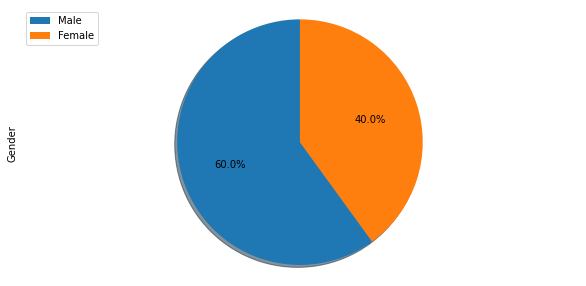

In [45]:
#This code is using the plot() method to generate a pie chart that visualizes the distribution of employees across different genders. The kind='pie' argument specifies that a pie chart should be created. The figsize=(10, 5) argument sets the size of the plot to 10 inches wide by 5 inches tall. The autopct='%1.1f%%' argument specifies a format string for the labels that show the percentage of the whole for each wedge of the pie chart. The startangle=90 argument sets the starting angle of the pie chart to 90 degrees. The shadow=True argument adds a shadow effect to the wedges of the pie chart. The labels=None argument removes the labels for each wedge of the pie chart. The axis('equal') function ensures that the pie chart is a circle, rather than an oval. The legend() function adds a legend to the plot, with labels 'Male' and 'Female' and a location of 'upper left'. Finally, the show() method is used to display the plot.


gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

In [46]:
#This code is using the groupby() method to group the rows of the gda DataFrame by the 'Gender' column. The value_counts() method is then used to count the number of occurrences of each unique value in the 'Attrition' column, within each group. The normalize=False argument specifies that the counts should not be normalized to sum to 1. The resulting series is then unstacked to create a DataFrame with a hierarchical index. Finally, the transpose() method is used to transpose the resulting DataFrame, so that the rows and columns are reversed.
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


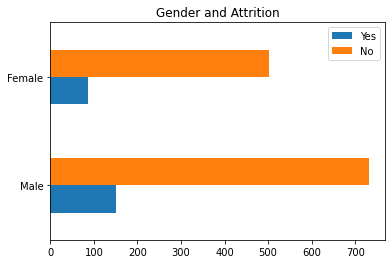

In [47]:
#This code is creating a bar chart that visualizes the number of employees who have left the company (i.e., have an 'Attrition' value of 'Yes') and the number of employees who have not left the company (i.e., have an 'Attrition' value of 'No'), grouped by gender.

n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Gender'].value_counts()

n_df.plot.barh(title = 'Gender and Attrition')

*Analysis based on Marital Status*

In [48]:
#This code is creating a new DataFrame called ms that contains only the 'MaritalStatus' and 'Attrition' columns from the original DataFrame df. The head() method is then called on the ms DataFrame to display the first few rows of the data.
#The resulting ms DataFrame will contain two columns: 'MaritalStatus' and 'Attrition'. The 'MaritalStatus' column will contain the marital status of each employee (e.g., 'Single', 'Married', etc.), and the 'Attrition' column will contain the value 'Yes' if the employee has left the company or 'No' if the employee has not left the company.
ms = df[['MaritalStatus', 'Attrition']]
ms.head()


,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [49]:
#This code is using the value_counts() method to count the number of occurrences of each unique value in the 'MaritalStatus' column of the ms DataFrame. The value_counts() method returns a Pandas series that contains the counts of each unique value in the specified column, in descending order.

ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

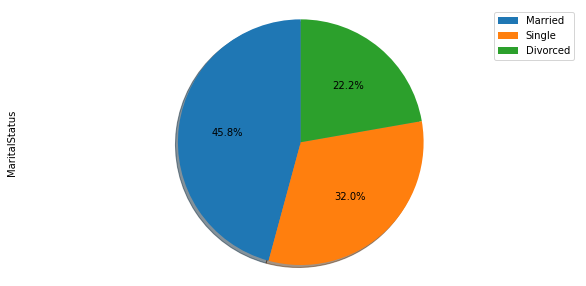

In [50]:
#This code is using the plot() method to create a pie chart that shows the distribution of the 'MaritalStatus' column in the ms DataFrame. The plot() method takes several optional arguments that allow you to customize the appearance of the plot.

ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper right') 

In [51]:
#This code is using the groupby() method to group the rows of the ms DataFrame by the values in the 'MaritalStatus' column. The value_counts() method is then applied to the 'Attrition' column, and the unstack() method is used to pivot the resulting Pandas series into a DataFrame.
#The resulting DataFrame will have the unique values of the 'MaritalStatus' column as the index, and the 'Attrition' column as the columns. The values in the DataFrame will be the counts of the 'Attrition' values within each group.
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


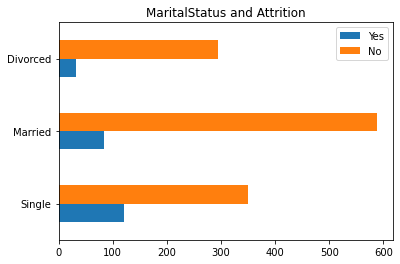

In [52]:
#This code is creating a new empty DataFrame called n_df and then using the value_counts() method to count the number of 'Yes' and 'No' values in the 'MaritalStatus' column for employees who left (Yes) or stayed (No) the company.
#The resulting Pandas series are then stored in the 'Yes' and 'No' columns of the n_df DataFrame.
#The plot.barh() method is used to create a horizontal bar plot of the 'Yes' and 'No' values in the n_df DataFrame. The plot will have a title of 'MaritalStatus and Attrition'.
#This code will create a bar plot that shows the number of employees who left (Yes) or stayed (No) the company for each unique value of the 'MaritalStatus' column. The plot will allow you to compare the relative proportions of employees who left or stayed for different marital status categories.

n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['MaritalStatus'].value_counts()

n_df.plot.barh(title = 'MaritalStatus and Attrition')

*Employee Analysis with features OverTime, MonthlyIncome corresponding to Attrition*

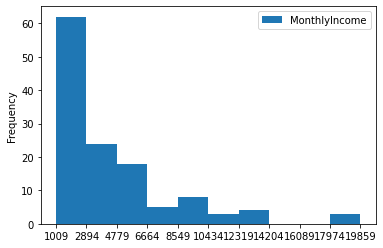

In [53]:
#This code is creating a histogram that shows the distribution of monthly income for employees who worked overtime and left the company. The histogram will allow you to visualize the range of monthly income values and the frequency of employees within each income range.

dot = df[['OverTime', 'MonthlyIncome', 'Attrition']]
oyay = dot[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')]
oyay = oyay.sort_values(by = 'MonthlyIncome', ascending=False, axis=0) #sorting to get the top values
count, bin_edges = np.histogram(oyay['MonthlyIncome'])

oyay.plot(kind='hist', xticks=bin_edges)

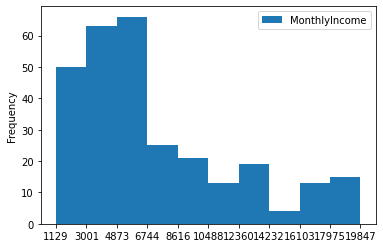

In [54]:
#This code is creating a histogram plot of the distribution of the 'MonthlyIncome' variable for employees who work overtime (OverTime == 'Yes') and who have not left the company (Attrition == 'No'). The histogram is created by first selecting the relevant data from the 'dot' dataframe, using a boolean filter to select only rows where OverTime is 'Yes' and Attrition is 'No'. The resulting data is then sorted by 'MonthlyIncome', in descending order. The number of bins for the histogram is determined using the NumPy function 'np.histogram', which returns the count of data points in each bin and the edges of the bins. Finally, the data is plotted as a histogram using the 'plot' method, with the bin edges specified using the 'xticks' parameter. The resulting plot shows the distribution of 'MonthlyIncome' for employees who work overtime and have not left the company.

oyan = dot[(df['OverTime']=='Yes') & (df['Attrition']=='No')]
count, bin_edges = np.histogram(oyan['MonthlyIncome'])

oyan.plot(kind='hist', xticks=bin_edges)


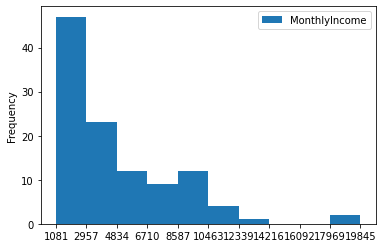

In [55]:
#This code is creating a histogram of the distribution of monthly income for employees who have not worked overtime and who have left the company (attrition == 'Yes'). The histogram is created using the "hist" method of the "dot" DataFrame, which includes the "OverTime" and "Attrition" columns, and the resulting plot is shown using the "plot" method. The x-axis of the plot represents the bins of the histogram, which are determined by the "bin_edges" variable. The y-axis represents the number of employees in each bin. This code is meant to visualize the relationship between monthly income, overtime work, and employee attrition.

onay = dot[(df['OverTime']=='No') & (df['Attrition']=='Yes')]
count, bin_edges = np.histogram(onay['MonthlyIncome'])

onay.plot(kind='hist', xticks=bin_edges)

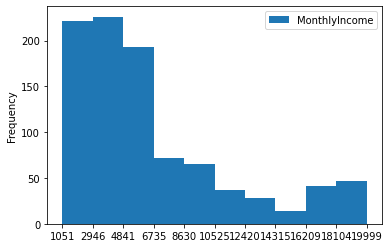

In [56]:
#This code is creating four subsets of the dot dataframe based on the values of the OverTime and Attrition columns. It then plots a histogram for each subset, with the x-axis representing the MonthlyIncome values and the y-axis representing the frequency of those values in the subset. The code is intended to show the distribution of MonthlyIncome values for employees who did or did not work overtime and experienced or did not experience attrition.

onan = dot[(df['OverTime']=='No') & (df['Attrition']=='No')]
count, bin_edges = np.histogram(onan['MonthlyIncome'])

onan.plot(kind='hist', xticks=bin_edges)


*Attrition analysis based on Age of employee*

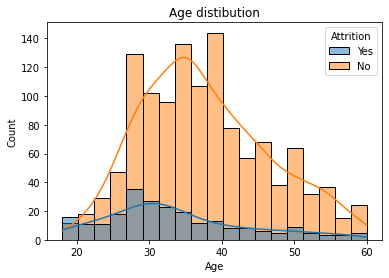

In [57]:
#This code is plotting a histogram of the age of employees in the data set, separated by their attrition status. The x-axis represents the age of employees, and the y-axis represents the count of employees in each age bin. The histogram is overlaid with a density plot, which is a smoothed version of the histogram that estimates the probability density function of the data. The plot is also colored according to the attrition status of the employees, with one color representing employees who left the company (attrition='Yes') and another color representing employees who did not leave the company (attrition='No'). The title of the plot is 'Age distribution'.

sns.histplot(data=df,x='Age',hue='Attrition',kde=True)
plt.title(label='Age distibution')
plt.show()



*Showing the number of employees that left and stayed considering the ages of employee*

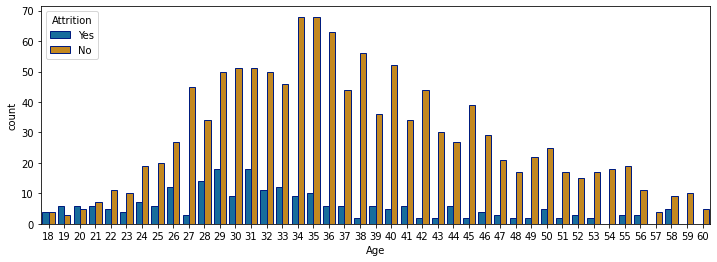

In [58]:
#This code is creating a count plot using the seaborn library to visualize the distribution of the Attrition variable with respect to the Age variable in the df dataframe. 
#It is creating a new figure with specified dimensions and setting the x axis to the Age column and the hue parameter to the Attrition column. The count plot is plotted on the ax axis using the countplot function from the seaborn library and using the colorblind palette for the colors. The edgecolor parameter is also set to a single color from the dark palette. 
#The plot is then displayed using the show function.


fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

**From the above visualization we can see that the employee of age 29 and 31 has the highest attrition and age 34 and 35 has the highest retention**

# Creating Machine Learning models for prediction of employee attrition

In [59]:
#This code is calculating the pairwise correlation between all columns in the dataframe df. Correlation is a statistical measure that indicates the extent to which two variables are related
#In this case, the correlation between each pair of columns in the dataframe is calculated.

df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


*Let's Visualise the co relation by using Heatmap*



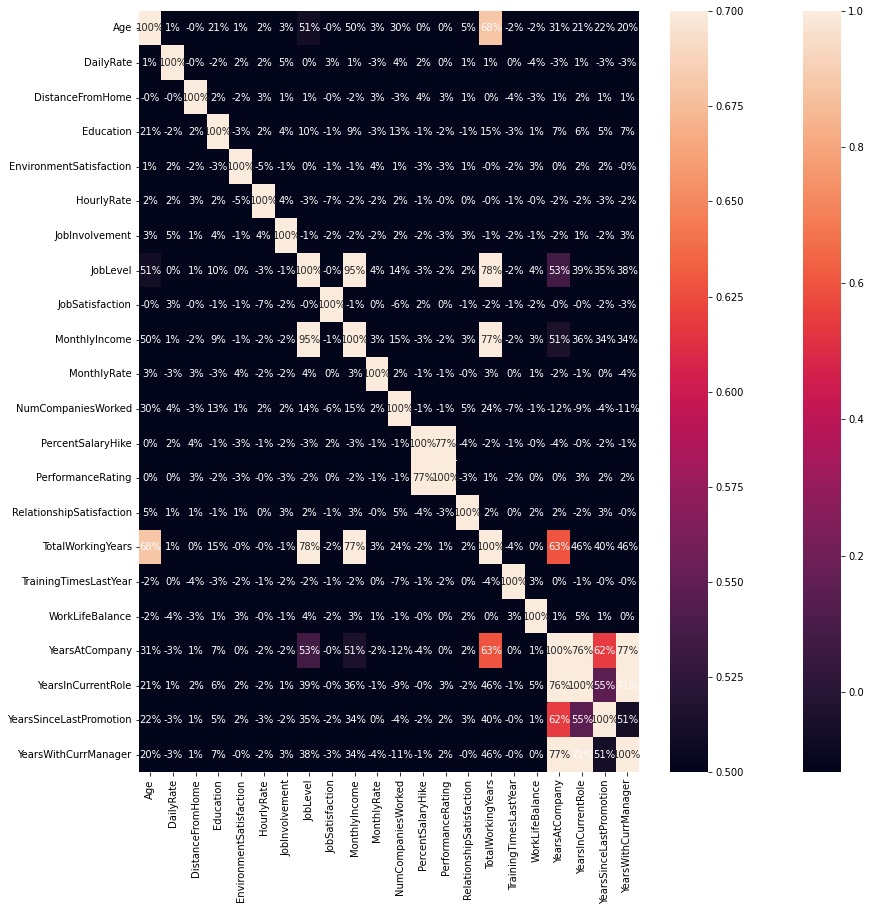

In [60]:
#This code generates a heatmap visualization of the correlations between the different variables in the df DataFrame. The heatmap uses color to encode the strength of the correlations, with warmer colors (red, yellow) indicating strong positive correlations and cooler colors (blue) indicating strong negative correlations. The annot=True parameter adds the actual correlation coefficients as labels on the heatmap, and the fmt='.0%' parameter formats the labels as percentages. The vmin and vmax parameters set the range of values that will be colored in the heatmap, with values outside this range being shown in white.

plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')
sns.heatmap(df.corr(), vmin=0.5, vmax=0.7)
plt.show()

*Now let’s prepare the data for the model. We will first transform non-numeric columns to numerical columns.*

In [61]:
#This code is performing label encoding on the categorical variables in the df dataframe.
#n this code, the for loop iterates over all the columns in the df dataframe. For each column, if the data type of the column is not a number (i.e., it is a categorical variable), the code applies label encoding to the column. This is done using the LabelEncoder class from the sklearn.preprocessing module. The LabelEncoder class assigns a unique integer value to each unique category in the column.

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-61-15a990f87968>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


*Next I am going to create a new column to store the age values in. This is only to put the age values at the end of the data set. Then I will remove the column age from the front of the data set so that the target column is first.*

*Let's see the new data set*

In [62]:
#This code is creating a new column called 'Age_Years' at the end of the dataframe 'df', which contains the same values as the 'Age' column. Then, it removes the 'Age' column from the dataframe using the drop function, with the axis parameter set to 1 to indicate that a column is being dropped. Finally, it displays the modified dataframe.
df['Age_Years'] = df['Age']
df = df.drop('Age', axis = 1)
df



,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,1,3,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,0,1,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,0,2,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,0,3,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,0,2,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,0,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,0,3,17,3,1,9,6,0,8,31


*Spliting the data into independent ‘X’ and dependent ‘Y’ data sets*

In [63]:
#This code is creating two variables, X and Y, by selecting and assigning values from the dataframe df.

#X is assigned the values of all the columns in df, except the first column, which is the target column. Y is assigned the values of the first column in df, which is the target column.

#The iloc function is used to select rows and columns based on their integer indices. In this case, df.iloc[:, 1:df.shape[1]] selects all rows and all columns from the second column (index 1) to the last column (df.shape[1]) of df. Similarly, df.iloc[:, 0] selects all rows of the first column (index 0) of df. The .values attribute is used to extract the values as a numpy array from the resulting dataframe or series.

X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

*Now I want to split the data set into 70% training and 30% testing data sets*

*Data Preprocessing and Pipelining*

In [64]:
#This code is performing a train-test split on the data. It is splitting the data into two sets: the training set and the test set. The training set will be used to train the model, and the test set will be used to evaluate the model's performance. The train_test_split function from the sklearn.model_selection module is being used to split the data. The X and Y variables contain the features (inputs) and the labels (outputs) of the data, respectively. The test_size argument specifies the proportion of the data that should be allocated to the test set. In this case, it is set to 0.30, meaning that 30% of the data will be allocated to the test set and the remaining 70% will be allocated to the training set. The random_state argument specifies a seed value for the random number generator used to shuffle the data before the split. This is useful for reproducing the results of the split.



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [65]:
#This code is printing the shapes of the training and test datasets for the independent variables (X_train and X_test) and the dependent variable (Y_train and Y_test). The train_test_split() function is a function from the sklearn.model_selection library that splits the data into training and test sets. The test_size parameter specifies the proportion of the data to be used for testing, and the random_state parameter specifies the random seed to use when shuffling the data before splitting it. In this case, the code is splitting the data into training and test sets with a 70/30 ratio and a random seed of 0.



print('Train dataset shape:',X_train.shape)
print('Test dataset shape', Y_train.shape)

Train dataset shape: (1029, 29)
Test dataset shape (1029,)


*Now let’s use the Random Forest Classifier to learn from the training data and see how accurate it is on that data*

In [66]:
#This code is training a random forest classifier on the training data X_train and Y_train. The random forest classifier is an ensemble model that uses multiple decision trees to make predictions. The n_estimators parameter specifies the number of decision trees in the forest, and the criterion parameter specifies the function to measure the quality of a split. The random_state parameter sets the seed for the random number generator, so that the results can be reproduced. Once the model is trained, it can be used to make predictions on new data.

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

*Now get the accuracy of the model*

In [68]:
#This code is training a Random Forest classifier on the training data using the fit method, and then it is evaluating the model's performance on the training data using the score method. The score method returns the accuracy of the model on the input data, which is the percentage of correct predictions made by the model.
print("The performance rate of Random Forest Classifier is: ")
forest.score(X_train, Y_train)

The performance rate of Random Forest Classifier is: 


0.9815354713313897

*Showing the confusion matrix and accuracy of the model*

In [70]:
#This code is using the confusion_matrix function from the sklearn.metrics module to create a confusion matrix based on the true labels (Y_test) and the predicted labels (forest.predict(X_test)) for some test data.
#The code  prints the confusion matrix and calculates the overall accuracy of the model by dividing the total number of correct predictions (TP + TN) by the total number of predictions made (TP + TN + FP + FN). Finally, it prints the resulting accuracy as a percentage.
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm1[0][0]
TP = cm1[1][1]
FN = cm1[1][0]
FP = cm1[0][1]

print("The confusion matrix of Random Forest Classifier is: ") 
print(cm1)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()



The confusion matrix of Random Forest Classifier is: 
[[359  12]
 [ 60  10]]
Model Testing Accuracy = "0.8367346938775511!"



*Let's plot the confusion matrix*

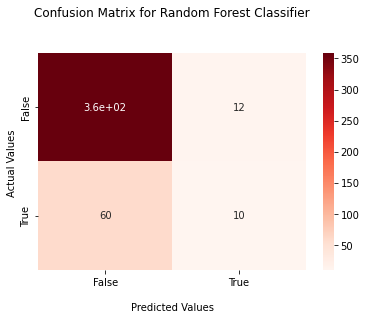

In [76]:
#This code is using the heatmap function from the seaborn library to create a visual representation of the confusion matrix.

import seaborn as sns
ax = sns.heatmap(cm1, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix for Random Forest Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**The model correctly identified 82.86% of the employees that left the company**

*Let’s see what the model thinks are the important features*

In [77]:
#This code is using a RandomForestClassifier object (forest) to calculate the importance of each feature in the data and then creating a DataFrame to display the results.
#The code creates a DataFrame called importances with two columns: 'feature' and 'importance'. 
#The 'feature' column contains the names of the features, which are the column names of the data except for the target column (df.iloc[:, 1:df.shape[1]]). The 'importance' column contains the feature importances, which are rounded to three decimal places using the round function.
#The DataFrame is then sorted by the 'importance' column in descending order using the sort_values function and the set_index function is used to set the 'feature' column as the index of the DataFrame. The resulting DataFrame will display the importance of each feature in the data.

importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances


,importance
feature,
MonthlyIncome,0.076
HourlyRate,0.063
MonthlyRate,0.058
OverTime,0.057
Age_Years,0.056
DailyRate,0.052
TotalWorkingYears,0.047
YearsAtCompany,0.043
DistanceFromHome,0.041


*There are a lot of features to look at, so it is best to see a visualization of the data*

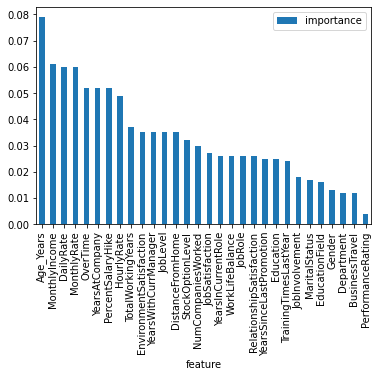

In [ ]:
#This code is using the plot method of the importances DataFrame to create a bar plot of the feature importances.


importances.plot.bar()

*KNN Classifier Algorithm*

In [78]:
#This code is using the KNeighborsClassifier class from the sklearn.neighbors module to create a k-nearest neighbors (KNN) classifier.
#The KNN classifier is trained on the training data (X_train and Y_train) using the fit method. Once the classifier is trained, it can be used to make predictions on the test data (X_test) using the predict method. The predicted labels are stored in the y_pred variable.


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("The accuracy of KNN Classifier is:",(knn.score(X_test, Y_test)))


The accuracy of KNN Classifier is: 0.8208616780045351


In [80]:
#This code is using the confusion_matrix function from the sklearn.metrics module to create a confusion matrix based on the true labels (Y_test) and the predicted labels (y_pred) for some test data.


from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, y_pred)
print("The Confusion Matrix for KNN Classifier is :")
print(cm2)



The Confusion Matrix for KNN Classifier is :
[[357  14]
 [ 65   5]]


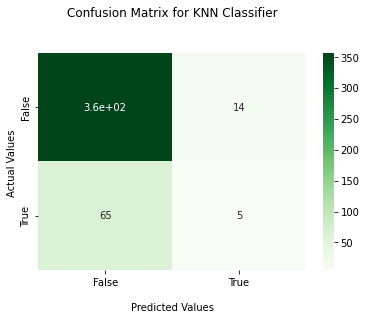

In [81]:
#This code is using the heatmap function from the seaborn library to create a visual representation of the confusion matrix.


import seaborn as sns
ax = sns.heatmap(cm2, annot=True, cmap='Greens')
ax.set_title('Confusion Matrix for KNN Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

*Decision Tree Classifier Algorithm*

In [ ]:
#The code trains and evaluates a decision tree classifier
#First, the data is split into training and test sets using the train_test_split function from sklearn.model_selection. The training set will be used to fit the model, and the test set will be used to evaluate the model's performance.
#Next, a decision tree classifier is created using DecisionTreeClassifier and then fit to the training data using the fit method.
#Then, the model is used to make predictions on the test data using the predict method, and the predictions are stored in y_pred.
#The accuracy of the model is then calculated using the accuracy_score function from sklearn.metrics, which compares the true test labels (y_test) to the predicted labels (y_pred). The accuracy score is printed to the console.
#Finally, a confusion matrix is constructed using the confusion_matrix function from sklearn.metrics, which provides a summary of the model's performance. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions made by the model. The confusion matrix is printed to the console.


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X = df[["DailyRate", "DistanceFromHome", "YearsAtCompany"]]
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("The accuracy of the Decision tree Classifier is : ",(accuracy_score(y_test, y_pred)))


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


The accuracy of the Decision tree Classifier is :  0.7255434782608695
[[253  59]
 [ 42  14]]


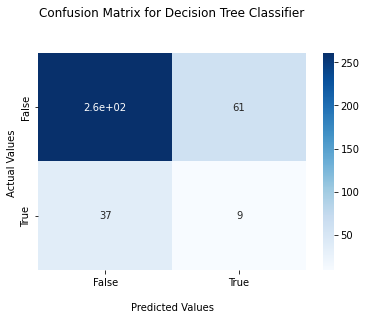

In [ ]:
#This code is creating a visualization of a confusion matrix using the Seaborn library.


ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Decision Tree Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()